## Truncated SVD

Singluar Value Decomposition is a matrix factorization technique (internally used by PCA). Plain SVD will factor the matrix to have same number of columns. When the number of columns is reduced from $N$ to $M$ that's where the dimentionality is reduced. 

Truncated SVD is nearly the same as PCA. The differences are:
1. PCA doesn't support sparse matrices, truncated SVD does. 
2. PCA is same as SVD on centered-data. SVD needn't centered (that's the reason it accepts sparse matrices)
3. PCA operates on convariance matrix, SVD operates on input matrix directly. (Another reason why PCA needs to perform on entire matrix and can't handle sparse ones)

In practise, SVD is good on huge datasets that cannot be centered because of memory requirements.

Applying truncated SVD to tfidf values is knows as __Latent Semantic Analysis__ Tutorial: [link](http://mccormickml.com/2016/03/25/lsa-for-text-classification-tutorial/)

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Wine.csv')
X = df.iloc[:, :13].values   # Using 1:2 as indices will give us np array of dim (10, 1)
y = df.iloc[:, 13].values

df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [12]:
# Split in training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [13]:
# Always scale data for good results on PCA
from sklearn.preprocessing import StandardScaler
X_sca = StandardScaler()
X_train = X_sca.fit_transform(X_train)
X_test = X_sca.transform(X_test)

In [14]:
from sklearn.decomposition import TruncatedSVD

fa = TruncatedSVD(n_components=2)
X_train = fa.fit_transform(X_train)
X_test = fa.transform(X_test)

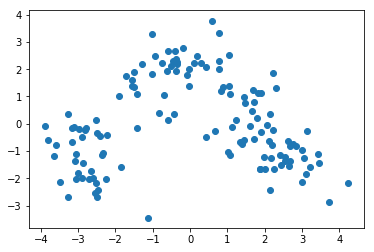

In [15]:
plt.scatter([x[0] for x in X_train], [x[1] for x in X_train])
plt.show()

In [16]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
y_pred = clf.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[14,  0,  0],
       [ 1, 18,  0],
       [ 0,  1, 11]], dtype=int64)

In [19]:
clf.score(X_test, y_test)

0.9555555555555556

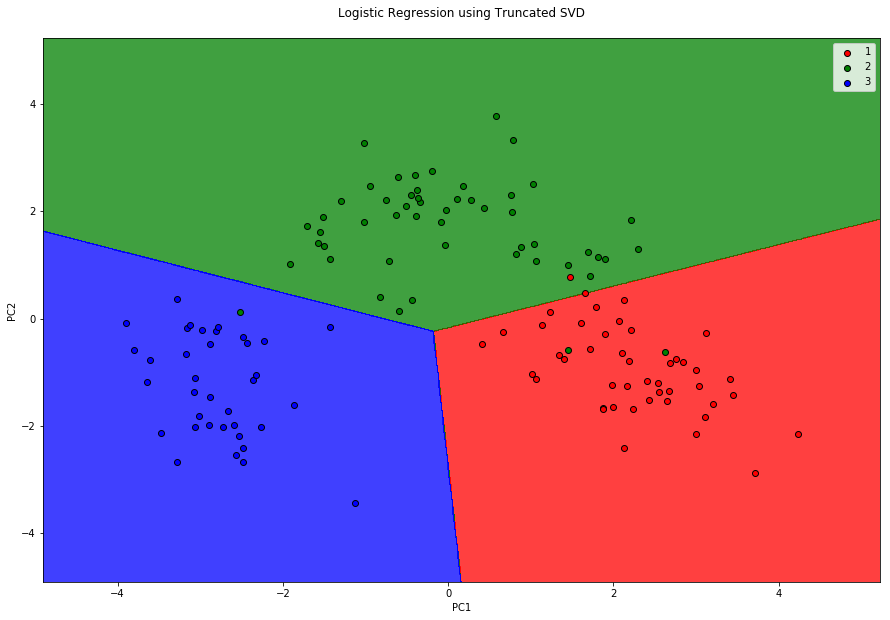

In [21]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
fig = plt.figure(figsize=(15, 10))
# generates every pixel in the table. MeshGrid creates one entry for every point from X1 to X2
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01))
# classifies every pixel as 0 or 1
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green', 'blue')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green', 'blue'))(i), label=j, edgecolor='black')
plt.xlim(X1.min(), X1.max())
plt.legend()
plt.ylim(X2.min(), X2.max())
plt.title('Logistic Regression using Truncated SVD\n')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()